<a href="https://colab.research.google.com/github/RSKothari/Learn-Backprop/blob/main/Line_Fitting_using_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [402]:
#  Load required packages
import numpy as np
import matplotlib.pyplot as plt

In [403]:
def generate_points(num_pts=1000, mode='linear', add_noise=True, normalize=False):
  
  if mode == 'linear':
    #  Generate random points along a line
    random_slope = 5*np.random.rand(1, ) - 2.5  # Random slope
    random_intercept = 20*np.random.rand(1, ) - 10  # Random intercept

    x_values = 100*np.random.rand(num_pts, ) - 50
    y_values = random_slope*x_values + random_intercept

    #  Play with numbers here to change the noise level
    x_noise = np.random.normal(0, 5, num_pts) if add_noise else 0
    y_noise = np.random.normal(0, 5, num_pts) if add_noise else 0

    gt_params = {'slope': random_slope,
                 'intercept': random_intercept}

    return (x_values + x_noise, y_values + y_noise, gt_params)

# Introduction to Gradient Descent (GD)

Previously, we learnt how to fit a line model (or linear model) to multiple data points. The linear least-squares solution is a closed-form solution. An alternative, **iterative approach**, is called Gradient Descent.

An iterative approach consists of iterations, or steps, towards the optimal solution. Formally, GD says

$H_{new} = H_{old} - \alpha \nabla f(H_{old})$

Recall, in our previous notebook, $H$ were the parameters of our model (which happens to be a line in our case or it could be a multi-billion parameter model by NVIDIA).

$\alpha$: is a parameter called learning rate

$f$: is a function which computes error as the model parameters, $H$, vary

GD follows the intuition that we must keep stepping in the direction our error is minimized.

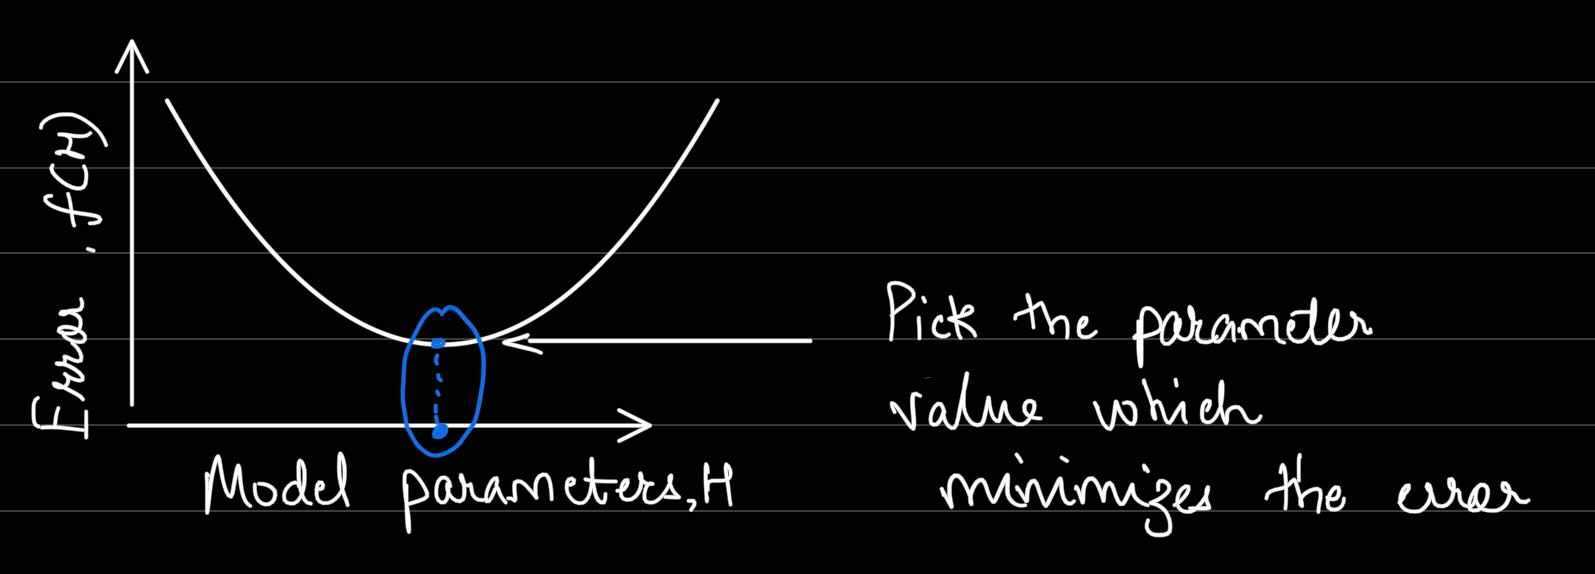


# Line fitting using GD

Recall from our previous notebook, that the model prediction $\hat{Y}_{(1\times N)} = H_{(1\times 2)}X_{(2\times N)}$, where $X$ is denoted as $[x_i, 1]^T$ for $i \in [0...N]$.

One of the error functions, Euclidean distance is given by:

$f(H) = \frac{1}{N} \sqrt{\sum_{i=1}^{N} (y_i - \hat{y}_i(H))^2 } $

We need to find, $\nabla f(H)$, which is the gradient of function $f$ with respect to $H$.

The above equation is cumbersome to differentiate. Another error function, known as the mean squared error (MSE) loss achieves the same objective while greatly simplifying the derivative.

$f(H) = \frac{1}{2N} \sum_{i=1}^{N} (y_i - \hat{y}_i(H))^2$

# Gradient

Our model comprises of two independant parameters, $M$ and $C$.

$M^+$ $\leftarrow M - \alpha \nabla f(M)$

 $C^+$ $\leftarrow C - \alpha \nabla f(C)$

 Let us derive the parameter update rule for $M$;
 
 $\nabla f(M) = \frac{\delta (\frac{1}{2N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2)}{\delta M}$

 $\nabla f(M) = \frac{1}{2N} \sum_{i=1}^{N} \frac{\delta}{\delta M} (y_i - \hat{y}_i)^2$

 $\nabla f(M) = \frac{1}{2N} \sum_{i=1}^{N} 2(y_i - \hat{y}_i)(-\frac{\delta}{\delta M}\hat{y}_i)$

$\nabla f(M) = \frac{1}{N} \sum_{i=1}^{N} ( \hat{y}_i - y_i) x_i$
 



# Homework

Derive the parameter update rule for $C$

# Solution

Please enter your solution here.

Your work should result in the following equation:
$\nabla f(C) = \frac{1}{N} \sum_{i=1}^{N} ( \hat{y}_i - y_i)$



In [404]:
def forward(model, x):
  return model['slope']*x + model['intercept']

The recovered slope is: -1.771102. Groundtruth is: -1.827551
The recovered intercept is: -4.624041. Groundtruth is: -7.440420


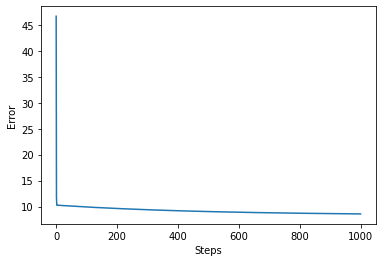

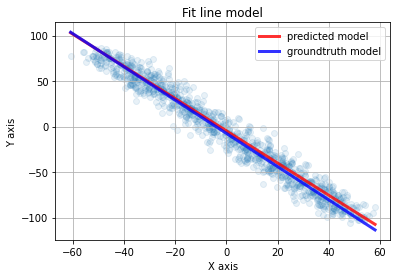

In [405]:
x_inputs, y_gt, gt_params = generate_points(add_noise=True)
num_pts = len(x_inputs)

model = {}

# We initialize with 0s
model['slope'] = 0
model['intercept'] = 0

model['error'] = []
model['step'] = []

alpha = 1e-3  # Set the learning rate
steps = 1000 #  10000

for step in range(steps):

  y_preds = forward(model, x_inputs)

  model['slope'] = model['slope'] - alpha*np.mean((y_preds - y_gt)*x_inputs)
  model['intercept'] = model['intercept'] - alpha*np.mean(y_preds - y_gt)
  model['error'].append(np.mean(np.abs(y_preds - y_gt)))
  model['step'].append(step)

fig, axs = plt.subplots()
axs.plot(model['step'], model['error'])
axs.set_xlabel('Steps')
axs.set_ylabel('Error')

print('The recovered slope is: %f. Groundtruth is: %f' % (model['slope'], gt_params['slope']))
print('The recovered intercept is: %f. Groundtruth is: %f' % ( model['intercept'], gt_params['intercept']))

pred_line = [x_inputs.min(),
             x_inputs.max(),
             forward(model, x_inputs.min()),
             forward(model, x_inputs.max())]
gt_line = [x_inputs.min(),
           x_inputs.max(),
           forward(gt_params, x_inputs.min()),
           forward(gt_params, x_inputs.max())]

fig, axs = plt.subplots()
axs.scatter(x_inputs, y_gt, alpha=0.1)
axs.plot(pred_line[:2], pred_line[2:], 'r-', linewidth=3, alpha=0.8)
axs.plot(gt_line[:2], gt_line[2:], 'b-', linewidth=3, alpha=0.8)
axs.set_xlabel('X axis')
axs.set_ylabel('Y axis')
axs.axis('on')
axs.grid('on')
axs.set_title('Fit line model')
axs.legend(['predicted model', 'groundtruth model'])

# Importance of proper initialization

I urge the students to play with this piece of code.

*   Try turning off noise and verify that the model is working as expected.
*   Try initializing the mean and intercept values to ridiculously large numbers.
*   Change the learning rate and number of steps

# Homework

Leveraging the functions provided above, write your own script to visualize the model line fit on the data points as we keep stepping forward. You should be able to visualize the model gradually settling near the groundtruth line fit.